### Christian Roth und Andreas Waßmus:

# Major Assignment: Used Car Sales Analysis


### Kurs: Programming for Data Science
### Programmiersprache Python

Angewendete Pakte:

In [627]:
import pandas as pd
import numpy as np
#import seaborn as sns

### 1. Beschreibung Use Case

Der Verkauf von Kraftfahrzeugen (PKW) ist in Deutschland ein großer und wichtiger Absatzmarkt. Untergliedert in Neu- und Gebrauchtwagen hat er in 2019 ein Volumen von 191,7 Mrd. EUR. Dabei macht der Verkauf von Gebrauchtwagen mit einen Umsatz von 84,7 Mrd. EUR 44,2% des Marktes aus. Der Gebrauchtwagen ist zu zwei Dritteln gewerblich und einem Dittel privat organisiert. Ca. 5 Mio. Deutsche überlegen sich in den kommenden Jahren einen neuen Gebrauchtwagen zuzulegen. (Quelle: destatis, abgerufen am 23.08.2019, https://de.statista.com/themen/1377/gebrauchtwagenhandel/)


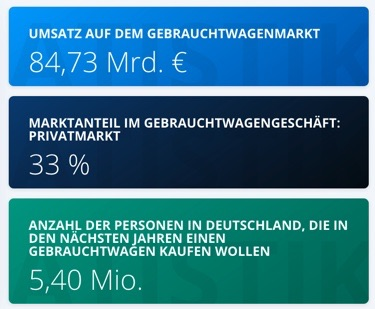


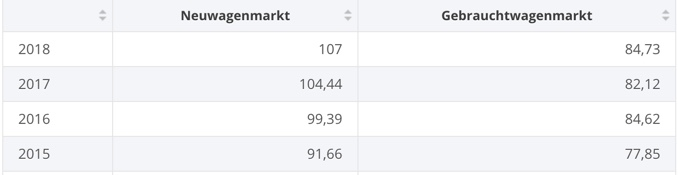


Im vorliegenden Assignment wird eine deskriptive Analyse des Gebrauchtwagenmarktes in Deutschland durchgeführt. Zu diesem Zweck wird auf einen Datensatz über Gebrauchtwagenkäufe aus dem Jahr 2016 einbezogen. Diese wird mit weiteren Datenpunkten gezielt angereichert, um zusätzliche regionale bzw. geographische Aspekte sowie Unternehmenszugehöritgkeiten von Marken darzustellen.  

Folgenden Fragestellungen soll im Rahmen dieses Assignments nachgegangen werden:

Welche Marktanteile von Marken gibt es im Gebrauchtwagenmarkt?
- Wie sieht die Verteilung der Marktanteile in Bezug auf Automobilkonzerne dar?
- Gibt es einen Unterschied zwischen der Verteilung der Marktanteile bei Neuwagen und Gebrauchtwagen?

weitere Marktcharakteristika:
- Wie viel Kilometer haben die Autos durchschnittlich gefahren?
- Wie sieht die Verteilung bei Diesel und Benzin aus?
- Wie lange ist eine Anzeige durchschnittlich online, bis das Auto verkauft wird?
- Wie viel PS haben die Autos?
- Welches Alter haben die Autos?
- Welche Fahrzeugform haben die Autos?

Wie entwickeln/unterscheiden sich die Preise?
Welche Fahrzeuge erzielen höhere Verkaufspreise?
- Welche Merkmale eines Autos haben einen Einfluss auf die Angebotspreise?
- Wie sieht die Verteilung der Preise für PKW in Bezug auf das Zulassungsjahr aus?
- Wie sieht die Verteilung der Preise in Bezug auf Kilomterleistung aus?
- Wie sieht die Verteilung der Preise in Bezug auf die Leistung von PKW aus?
- Wie sieht die Verteilung der Preise in Bezug auf die Kraftstoffart aus?
- Welche Marken erzielen die höchsten Preise?

Wie ist der Markt geografisch aufgeteilt?
- Wo werden besonders viele Autos angeboten bzw. verkauft?
- Gibt es höhere Preise in bestimmten Regionen in Deutschland beim Gebrauchtwagenverkauf?

### 2. Daten


Wir haben für die Auswertung einen Datensatz aus Kaggle verwendet. Diese Daten wurden im Jahr 2016 mit Scrapy von Ebay-Kleinanzeigen gecrawled. Es handelt sich um 371.528 Datensätze.

Datensatz: https://www.kaggle.com/orgesleka/used-cars-database




#### 1. Beschreibung der Daten:

##### Hauptdatensatz:

Folgende 19 Datenpunkte wurden gesammelt:

- dateCrawled: Datum, wann die Anzeige das erste mal gecrawlt wurde (alle Feldwerte stammen von diesem Datum)
- name: "Name" des Autos (Anzeigenname)
- seller: Gewerblicher oder privater Verkäufer
- offerType: Bei allen Datenpunkten handelt es sich um Angebote (diese Spalte ist für die Analyse nicht relevant)
- price : Der Angebotspreis der Anzeige (kein finaler Verkaufspreis) 
- abtest: Ausprägungen "test" und "control" (diese Spalte ist für die Analyse nicht relevant)
- vehicleType: Fahrzeugform, Kategorien von verschiedenen Fahrzeugtypen
- yearOfRegistration: Jahr der Erstzulassug
- gearbox: Getriebeart
- powerPS: Leistung in PS
- model: Modellname des Herstellers
- kilometer: Kilometerstand bei Verkauf
- monthOfRegistration: Monat der Erstzulassung
- fuelType: Kraftstoffart
- brand: Automarke
- notRepairedDamage: Nicht-reparierter Schaden am Auto (Variable lässt keine Aussage über die Höhe der unfallfreien Fahrzeuge zu
- dateCreated: Erstelldatum der Anzeige
- nrOfPictures: Fehlerhafter Spalte wird im Rahmen der Datenbereinigung aus Analyse entfernt
- postalCode: Postleitzahl
- lastSeenOnline: Wann wurde die Anzeige das letzte Mal vom crawler gesehen?






In [628]:
#Initialize relative path of csv-file
relpathCar="../MajorAssignment/used-cars-database/autos.csv"

#import csv-file into pandas df
df_carData=pd.read_csv(relpathCar,sep=",",encoding="latin-1", index_col=0)


In [629]:
print(df_carData.shape)
print('----------')
print(df_carData.columns)

(371528, 19)
----------
Index(['name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')


#### 2. Einbindung zusätzlicher Daten

Der Hauptdatensatz wurde dahingehend überprüft, ob es Sinn macht, an bestimmten Stellen Daten anzureichern. Hierzu kommen zwei Spalten in Betracht:
- brand
- postalCode

Zur Marke (brand) der PKWs wird eine CSV-Tabelle mit Konzernzugehörigkeiten der einzelnen Marken eingespielt. Diese CSV wurde selbst erstellt, da keine freiverfügbare Liste oder CSV-Datei gefunden wurde und ein Crawling-Prozess zu aufwendig zu programmieren gewesen wäre (Es gab keine strukturierte Abfragemöglichkeit, wie bspw. bei Assignment 04 in Wikipedia, sodass die Information aus unstrukturierten Daten herausgelesen hätte werden müssen. In Anbetracht des Informationsgehalts dieser Tabelle ist dieses Prozedere zu aufwendig). 

Bzgl. der Postleitzahlen (postalcode) wurden mehrer Datenbanken durchsucht und verschiedene CSV-Dateien gefunden, sodass mit deren Hilfe zu den Postleitzahlen der Name des Orts, die Fläche des Orts in km^2 sowie die Einwohnerzahl hinzugefügt werden können.Diese Dateien wurden von https://www.suche-postleitzahl.org/downloads und https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/Administrativ/05-staedte.html heruntergeladen (24.08.2019).


Used Car Data.jpg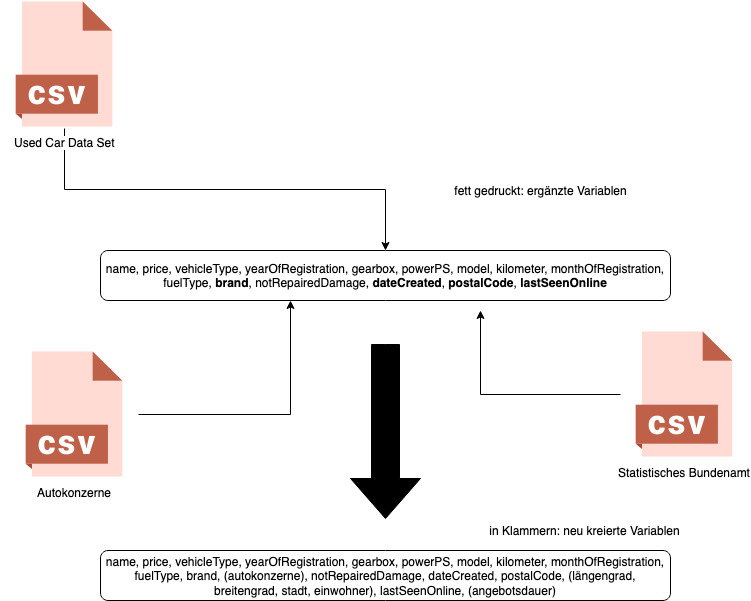

hier gibt es noch die Möglichkeit die Einwohnerdichte hinzuzufügen. Dann könnte man die Preise nicht nur geographisch sondern auch nach ballungszentren analysieren.


In [587]:
#Initialize relative path of csv-file
relpathKON="../MajorAssignment/Autokonzerne.csv"
relpathPLZ="../MajorAssignment/PLZ.csv"
relpathEIN="../MajorAssignment/plz_einwohner.csv"

In [588]:
#Einwohner je PLZ einlesen
df_population=pd.read_csv(relpathEIN,sep=",",encoding="UTF-8")

#Quelle http://www.fa-technik.adfc.de/code/opengeodb/PLZ.tab
#Alternative wäre geopy gewesen, aber funktioniert bei sovielen Zeilen wegen HTTP429 To many requests nicht
df_lonlat = pd.read_csv(relpathPLZ, sep='\t', encoding="utf-8")

#Konzernmarken einlesen
df_companies=pd.read_csv(relpathKON,sep=";",encoding="UTF-8")

In [589]:
#df_population und df_lonlat auf Basis von plz zusammenführen
df_postalCodeInfo = df_lonlat.merge(df_population, on='plz', how='left')

### 3. Data preparation

In diesem Abschnitt werden die Daten aufbereitet und bereinigt, so dass sie im Anschluss analysiert werden können. 

#### Übersicht und Einfinden in die Datensätze

In [590]:
#Rename postalCode zu plz
df_carData=carData.rename(columns = {'postalCode':'plz'})

Um die Online-Dauer einer Anzeige zu berechnen, wird die Spalte "offerTime" hinzugefügt und wie folgt berechnet:
Erstellungsdatum der Anzeige - Letztmaliger Anzeigenaufruf möglich = Anzahl der Tage Online

In [591]:
#Column dateCreated & lastSeen in Datetime umwandeln 
#dt.normalize() um die Anzeige und nicht dtype selbst zu verändern
df_carData["dateCreated"] = pd.to_datetime(df_carData["dateCreated"]).dt.normalize()
df_carData["lastSeen"] = pd.to_datetime(df_carData["lastSeen"]).dt.normalize()

#Added Column offerTime to calculate how long the car was online before it was sold 
df_carData["offerTime"]  = (df_carData["lastSeen"] - df_carData["dateCreated"]).dt.days

#Check dtypes
df_carData.dtypes

name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
plz                             int64
lastSeen               datetime64[ns]
offerTime                       int64
dtype: object

In [592]:
#show head of carData df
df_carData.head(50)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,plz,lastSeen,offerTime
dateCrawled,,,,,,,,,,,,,,,,,,,,
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07,14
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07,14
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05,22
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17,0
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06,6
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06,2
2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05,4
2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21,0,19348,2016-03-25,4
2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04,0,94505,2016-04-04,0


In [622]:
#Ausprägungen einer Spalte anzeigen lassen
df_carData["model"].value_counts()

golf                  30070
andere                26400
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8775
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5775
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse               4316
vectra                 4255
1er                    3837
mondeo                 3626
clio                   3553
touran                 3540
3_reihe                3503
punto                  3349
zafira                 3049
megane                 2927
ibiza                  2702
                      ...  
mii                      81
crossfire                66
range_rover_evoque       65
gl                       64
nubira              

In [623]:
#Check dtypes
#show head of carData df
df_carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 19 columns):
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen               371528 non-null obj

#### Umgang mit fehlenden und nicht benötigten Werten:

Grundsätzlich gibt es drei Möglichkeiten, mit den fehlenden Werten umzugehen: 

- 1. Wir löschen alle unvollständigen Datensätze.
- 2. Wir belassen die unvollständigen Datensätze im Dataset und verwenden verwenden für bestimmte Analyse nur die vollständigen Datensätze.
- 3. Wir ersetzen die fehlenden Werte.

Für die hier durchgeführte deskriptive Analyse reicht es zunächst aus, die NaN values im Datensatz zu belassen. Zur eindeutigen Kennzeichnung werden diese mit einen (-) ersetzt. Wir gehen somit mit Option zwei vor und werden, falls notwendig, für bestimmte deskriptive Analysen (bspw. Korrelationen) nur vollständige Datensätze zulassen. Für weitergehende Analysen ist zu prüfen, inwieweit diese Werte ersetzt werden können.

Im ersten Schritt wird der Datensatz um Gesuche bereinigt, sodass nur Angebote im Datensatz vorhanden sind. Gleichzeitig werden die Spalten "nrOfPictures", "offerType", "abtest" und "seller" gelöscht, da diese Spalten keinen Mehrwert für die nachfolgenden Analysen generieren und somit nicht benötigt werden.

In [630]:
#12 Gesuche, 371516 Angebote...--> Deshalb drop die 12 Gesuche 
df_carData = df_carData[df_carData.offerType != "Gesuch"]

#Spalte name in lowercase
df_carData = df_carData.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

#Datensätze löschen, welche die nachfolgenden Begriffe enthalten 
df_carData = df_carData[~df_carData.name.str.contains("such")]
df_carData = df_carData[~df_carData.name.str.contains("ankauf")]
df_carData = df_carData[~df_carData.name.str.contains("tausch")]
df_carData = df_carData[~df_carData.name.str.contains("abholung")]
df_carData = df_carData[~df_carData.name.str.contains("schlacht")]
df_carData = df_carData[~df_carData.name.str.contains("schenk")]

#drop not used columns - delete the columns without having to reassign (inplace)
df_carData.drop(['nrOfPictures','seller', 'offerType', 'abtest'], axis=1, inplace=True)

In [631]:
print(df_carData.shape)

(361312, 15)


In [596]:
#Check NaN values 
df_carData.isna().sum()

name                       0
price                      0
vehicleType            34474
yearOfRegistration         0
gearbox                17813
powerPS                    0
model                  18477
kilometer                  0
monthOfRegistration        0
fuelType               30231
brand                      0
notRepairedDamage      67607
dateCreated                0
plz                        0
lastSeen                   0
offerTime                  0
dtype: int64

NaN-Werte werden mit "-" ersetzt. Für das Attribut "monthOfRegistration" bleibt der Wert 0 = keine Angabe bestehen, da es ein numerisches Feld ist und ansonsten nicht für weitere Kalkulationen benutzt werden kann.

In [597]:
#Fill missing values with "-"
df_carData = df_carData.fillna("-")
df_carData.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,plz,lastSeen,offerTime
dateCrawled,,,,,,,,,,,,,,,,
2016-03-24 11:52:17,golf_3_1.6,480,-,1993,manuell,0,golf,150000,0,benzin,volkswagen,-,2016-03-24,70435,2016-04-07,14
2016-03-24 10:58:45,a5_sportback_2.7_tdi,18300,coupe,2011,manuell,190,-,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07,14
2016-03-14 12:52:21,"jeep_grand_cherokee_""overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,-,2016-03-14,90480,2016-04-05,22
2016-03-17 16:54:04,golf_4_1_4__3türer,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17,0
2016-03-31 17:25:20,skoda_fabia_1.4_tdi_pd_classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06,6


Erneute Überprüfung ob alle fehlenden Werte ersetzt wurden

In [598]:
carData.isna().sum()

name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Die Spalte "monthOfRegistration" enthalt 37.675 Datensätze mit dem Wert null.
Diese Werte werden ebenfalls mit (-) ersetzt oder
Für diese Werte wird die Mitte eines Jahres angenommen, um das Alter der Fahrzeuge zu berechnen.

In [599]:
#37675 wurden im Monat 0 zugelassen, was machen wir mit denen? -
df_carData['plz'].value_counts()

10115    823
65428    622
66333    339
38518    320
44145    313
32257    303
52525    302
78224    300
26789    291
48599    287
48249    281
60311    279
50354    279
53757    278
51065    277
13357    274
40764    272
60386    272
61169    266
52249    263
92637    260
65719    258
66424    258
45881    254
56070    254
13409    254
52428    250
44339    250
87700    250
59192    249
        ... 
36169      1
29361      1
29487      1
67587      1
91728      1
91471      1
8129       1
29484      1
67311      1
95356      1
72369      1
24244      1
21782      1
21712      1
91465      1
91744      1
9517       1
88719      1
67817      1
25889      1
31096      1
12625      1
83256      1
6638       1
23779      1
89446      1
83546      1
82493      1
21274      1
72667      1
Name: plz, Length: 8147, dtype: int64

#### Einbinden von Postleitzahlen, Einwohner und Fläche

Zunächst wird die Spalte "postalCode" aus dem carData Dataframe extrahiert und in ein neues Dataframe geschrieben. 

In [600]:
#Create df with unique postalCode values from carData
df_carData_postalCode = pd.DataFrame(df_carData['plz'].unique(),  columns=['plz']) 
df_carData_postalCode.head()

,plz
0,70435
1,66954
2,90480
3,91074
4,60437


Im Anschluss daran wird das anfangs eingelesene Dataframe "df_postalCodeInfo" mit dem soeben erstellen Dataframe zusammengeführt. 

In [601]:
df_locationData = df_carData_postalCode.merge(df_postalCodeInfo, on='plz' )

In [602]:
df_locationData.head()

,plz,#loc_id,lon,lat,Ort,einwohner
0,70435,9703,9.159157,48.830653,Stuttgart,206.0
1,66954,9414,7.564295,49.202121,Pirmasens,10417.0
2,90480,11724,11.132551,49.447293,Nürnberg,18393.0
3,91074,11774,10.878277,49.572095,Herzogenaurach,22222.0
4,60437,9033,8.678966,50.199217,Frankfurt am Main,3123.0


Abschließend werden für dieses DF ebenfalls die NaN-Werte geprüft und ggf. gelöscht.

In [603]:
#Check missing values 
df_locationData.isna().sum()

plz           0
#loc_id       0
lon           0
lat           0
Ort           0
einwohner    67
dtype: int64

In [604]:
df_locationData = df_locationData[pd.notnull(df_locationData['einwohner'])]

In [605]:
df_locationData.isna().sum()

plz          0
#loc_id      0
lon          0
lat          0
Ort          0
einwohner    0
dtype: int64

## Erstellung von analysefähigen Dataframes

Zunächst bauen wir einen Datensatz, welcher lediglich die Autos der Jahre 1986-2016 beinhaltet. Damit werden Oldtimer ausgeschlossen. 

## TODO

In [612]:
df_normalCars = df_carData[(df_carData.yearOfRegistration >= 1986) & (df_carData.yearOfRegistration <= 2016)]

In [632]:
df_oldtimerCars = df_carData[(df_carData.yearOfRegistration >= 1945) & (df_carData.yearOfRegistration <= 1986)]

In [641]:
df_allCars = df_carData[(df_carData.yearOfRegistration >= 1945) & (df_carData.yearOfRegistration <= 2016)]

In [643]:
df_allCars['yearOfRegistration'].value_counts()

2000    23022
1999    22090
2005    21618
2006    19936
2001    19757
2003    19545
2004    19422
2002    18803
2007    17452
1998    17334
2008    16009
2009    15499
1997    14203
2010    12267
2011    11989
1996    10486
2016     9385
2012     9384
1995     9003
2013     6139
2014     4783
1994     4683
1993     3323
1992     2957
2015     2954
1991     2705
1990     2534
1989     1286
1988      940
1985      725
        ...  
1974      199
1971      196
1977      191
1976      190
1960      173
1966      156
1969      150
1975      149
1968      145
1967      142
1965      119
1964       79
1963       77
1962       51
1961       48
1959       45
1956       33
1958       32
1957       27
1955       25
1950       22
1951       17
1953       15
1954       15
1952       12
1947        5
1948        4
1945        4
1949        3
1946        2
Name: yearOfRegistration, Length: 72, dtype: int64

In [615]:
df_carData.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,plz,lastSeen,offerTime
dateCrawled,,,,,,,,,,,,,,,,
2016-03-24 11:52:17,golf_3_1.6,480,-,1993,manuell,0,golf,150000,0,benzin,volkswagen,-,2016-03-24,70435,2016-04-07,14
2016-03-24 10:58:45,a5_sportback_2.7_tdi,18300,coupe,2011,manuell,190,-,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07,14
2016-03-14 12:52:21,"jeep_grand_cherokee_""overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,-,2016-03-14,90480,2016-04-05,22
2016-03-17 16:54:04,golf_4_1_4__3türer,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17,0
2016-03-31 17:25:20,skoda_fabia_1.4_tdi_pd_classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06,6


### 4. Analyse des Marktes

In [640]:
df_oldtimerCars.loc[df_oldtimerCars['yearOfRegistration'] == 1946]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
dateCrawled,,,,,,,,,,,,,,,
2016-03-17 11:52:18,oldtimer_1946_buick_roadmaster_sedanette_2_doo...,27600,coupe,1946,manuell,0,NaN,5000,7,benzin,sonstige_autos,nein,2016-03-17 00:00:00,38275,2016-03-25 12:47:23
2016-03-24 07:56:34,oldtimer_lkw_opel_blitz_kipper,1500,andere,1946,manuell,0,NaN,150000,12,benzin,sonstige_autos,NaN,2016-03-24 00:00:00,66133,2016-03-24 09:42:34


In [617]:
#Könnten wir ein pie chart drauß machen mit denen > 10.000 (Rest Sonstige)
df_carData['yearOfRegistration'].value_counts()

2000    23125
1999    22103
2005    21653
2006    19940
2001    19765
2003    19553
2004    19429
2002    18812
2007    17465
1998    17355
2008    16014
2009    15514
1997    14209
2010    12270
2011    11997
1996    10494
2017    10024
2016     9401
2012     9385
1995     9032
2013     6143
2014     4784
1994     4686
2018     3813
1993     3327
1992     2957
2015     2955
1991     2706
1990     2567
1989     1288
        ...  
9996        1
4100        1
6200        1
1600        1
1602        1
8000        1
5900        1
8200        1
2900        1
2066        1
2290        1
7777        1
2200        1
1001        1
5600        1
3800        1
4800        1
7100        1
8888        1
1200        1
1925        1
6500        1
1920        1
1919        1
1915        1
7800        1
1400        1
1911        1
3700        1
8455        1
Name: yearOfRegistration, Length: 145, dtype: int64

Idee...

Man könnte mit der Formel basierend auf den Verkaufspreisen den ursprünglichen Neuwagenpreis errechnen. Allerdings ist das schon sehr generell, da diese aus dem gesamten Datensatz abgeleitet wurde.
http://orgesleka.blogspot.com/2016/11/tabelle-zum-wertverlust-pro-jahr-bei.html

Eine individuelle regression zu bauen geht aus meiner Sicht über das Assignment hinausnicht.

In [646]:
df_brand = df_normalCars.loc[df_normalCars['brand'] == 'mercedes_benz']

corr = df_brand.corr()
corr.style.background_gradient()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,plz,offerTime
price,1,0.0158687,0.0058183,-0.00590334,0.00809864,0.00142035,-0.00426778
yearOfRegistration,0.0158687,1,0.0783443,-0.389304,0.0492249,0.00665614,0.0521095
powerPS,0.0058183,0.0783443,1,-0.0322603,0.0235858,0.00827779,0.0324732
kilometer,-0.00590334,-0.389304,-0.0322603,1,-0.011914,-0.0356301,-0.0719389
monthOfRegistration,0.00809864,0.0492249,0.0235858,-0.011914,1,-0.0121741,-0.00218581
plz,0.00142035,0.00665614,0.00827779,-0.0356301,-0.0121741,1,0.0254742
offerTime,-0.00426778,0.0521095,0.0324732,-0.0719389,-0.00218581,0.0254742,1
